In [1]:
%matplotlib inline
import numpy as np
import src.io as io
import src.components as cmpnt
import src.rigidbodies as rb

/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Domain decomposition
if needed, merge a couple of cluster center PDB files, first (see next section).

In [12]:
pdb_filename = 'ribosome_thermo_rna/iter0_pca/iter0_pca__oscillatory_IC4.pdb'
pdb_output = 'ribosome_thermo_rna/iter0_pca/rb_iter0_pca__oscillatory_IC4.pdb'

/Users/fpoitevi/gdrive/Toolkit/IsCAn/projects/summarizePDB/src/rigidbodies.py:59: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(frame_range==''):


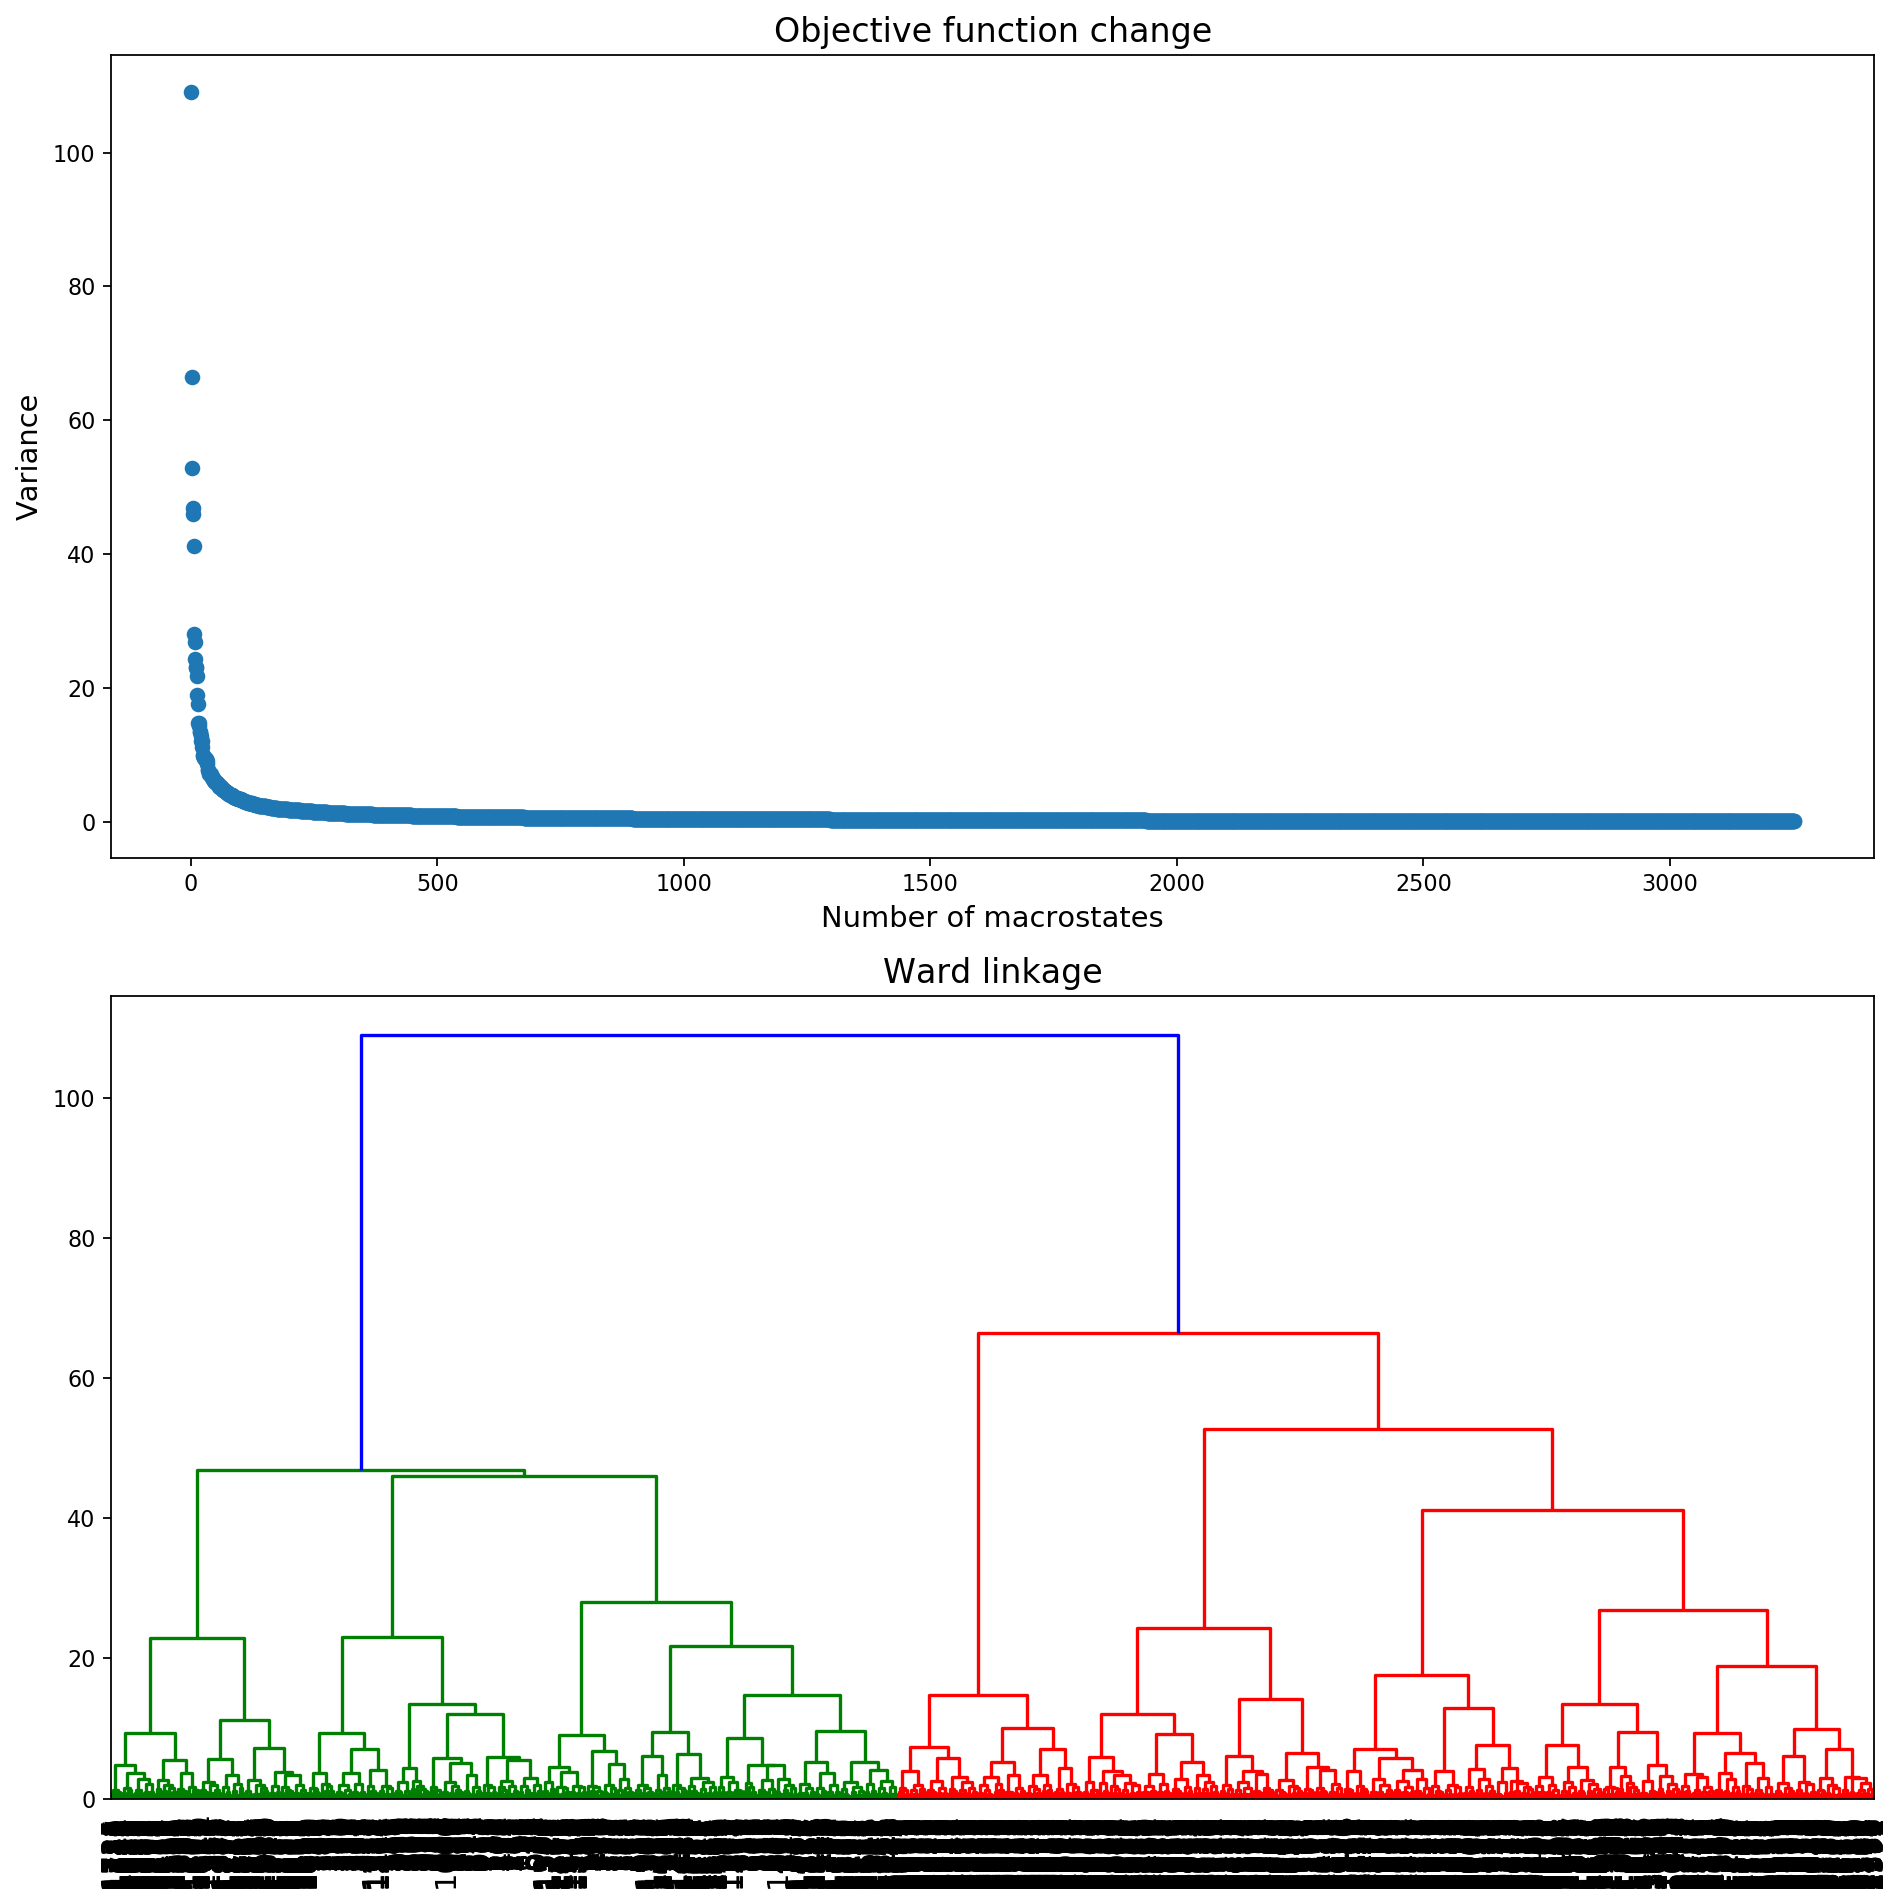

In [13]:
#traj, ids = io.load_dataset(pdb_filename,ids_filename=ids_filename,superpose=True)
traj = io.load_traj(pdb_filename)
rbclust = rb.cluster(traj,frame_range=np.arange(0,2,1))
cmpnt.plot_cluster(rbclust,np.arange(rbclust.shape[0]+1))

In [14]:
fluct,dist = rb.get_distance_fluctuation(traj,frame_range=np.arange(0,2,1))

/Users/fpoitevi/gdrive/Toolkit/IsCAn/projects/summarizePDB/src/rigidbodies.py:59: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(frame_range==''):


In [30]:
for i in np.arange(1,rbclust.shape[0]):
    diff = rbclust[i,2]-rbclust[i-1,2]
    if(diff > 3):
        #print(i,'/',rbclust.shape[0],' : ',diff)
        print(i,rbclust[i,2])
        #print(rbclust[0:100,2])

3246 41.1840577947
3247 46.0490677025
3249 52.8008534639
3250 66.419606407
3251 109.081245012


In [31]:
n_clusters = 7
method='ward'
assignment = rb.get_assignment(rbclust,n_clusters,method=method)
assignment_new = assignment
for wsize in [6,10,14,18,22]:
    assignment_new = rb.filter_assignment(traj,assignment,wsize=wsize)
    rb.save_cluster_in_bfac(traj,pdb_output,assignment_new)

# merge PDBs

In [ ]:
itemlist=('item1.pdb','item2.pdb')
io.merge_pdb_list(filelist=itemlist,output='merged.pdb',superpose=True)

In [ ]:
traj_joined = io.load_traj('merged.pdb',superpose=True)
rbclust = rb.cluster(traj_joined)
cmpnt.plot_cluster(rbclust,np.arange(rbclust.shape[0]+1))

In [ ]:
n_clusters = 6
assignment = rb.get_assignment(rbclust,n_clusters)
rb.save_cluster_in_bfac(traj_joined,'joined_rb.pdb',assignment)
assignment_new = assignment
for wsize in [6,10,14,18,22]:
    assignment_new = rb.filter_assignment(traj_joined,assignment,wsize=wsize)
    rb.save_cluster_in_bfac(traj_joined,'joined_rb2.pdb',assignment_new)